In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

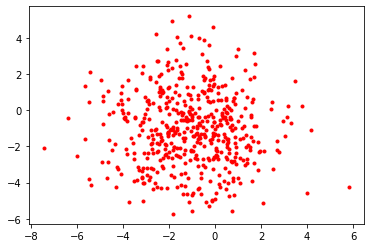

In [2]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [3]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


In [11]:
r = np.array([np.random.randint(500) for i in range(3)])

area = triarea(x[r[0]], y[r[0]], x[r[1]], y[r[1]], x[r[2]], y[r[2]])
r1 = (x[r[0]], y[r[0]])
r1

(-2.960548637051734, 0.06344713186599327)

55.02495940056191 [205, 191, 376]


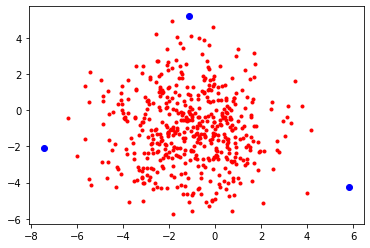

In [18]:
def rand_idx():
    return np.random.randint(500)

def perturb(state):
    new_state = state.copy()
    idx_to_change = np.random.randint(3)
    new_state[idx_to_change] = rand_idx()
    return new_state

def evaluate(state):
    r = [(x[idx], y[idx]) for idx in state]
    return triarea2(r)

def biggest_area():
    state = [rand_idx(), rand_idx(), rand_idx()]
    best_score = evaluate(state)
    for i in range(10000):
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if new_score > best_score:
            best_score = new_score
            state = new_state
    return state, best_score

sol, score = biggest_area()
plt.plot(x, y, '.r')
plt.plot([x[i] for i in sol], [y[i] for i in sol], 'ob')

print(score, sol)

In [19]:
a = [1, 2, 3]
b = a
b[1] = 99
print(b)
print(a)

[1, 99, 3]
[1, 99, 3]


### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0  1 46 ...  0 41 50]
 [ 1  0 12 ... 24 58  0]
 [46 12  0 ...  0 44 42]
 ...
 [ 0 24  0 ...  0 29 41]
 [41 58 44 ... 29  0 28]
 [50  0 42 ... 41 28  0]]


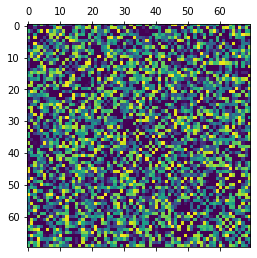

In [4]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print(student)

plt.matshow(student)

In [3]:
def initial_state():
    state = [np.random.randint(15) for i in range(70)]
    return state

def perturb(state):
    new_state = state.copy()
    idx_to_change = np.random.randint(len(new_state))
    new_state[idx_to_change] = np.random.randint(15)
    return new_state

def evaluate(state):
    score = 0
    for i in range(len(state)):
        for j in range(i, len(state)):
            if state[i] == state[j]:
                score += student[i,j]
    return score

def find_time_slot(n):
    state = initial_state()
    best_score = evaluate(state)
    for i in range(n):
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if new_score < best_score:
            state = new_state
            best_score = new_score
        if i%1000 == 0:
            print(i, best_score)
    return state, best_score

## Substitution Cipher is a bad idea

### Substitution Encryption

One of the weakest encryption is called substibution encryption. Here is how it works let's supposed that my message that I want to send to you is
```
this problem is easy
```

The substition encryption works by replacing each letter using a fixed dictionary. For example, suppose my encryption key dictionary is
```python
{'a':'b', 'b':'c', 'c':'d', ...}
```
This tells that every character `a` in the message should be replaced by letter `b` in the encrypted messsage and so on.

Using the dictionary above, then the encrypted message would be
```
uijt qspcmfn jt fbtz 
```

If we know the dictionary key(which is typically agreed before sending the message), it's very easy to invert. Since `a` maps to `b` in encryption that means to decrypt it we just need to replace every `b` to `a`.

ROT13 you did in programming I is an example of substitution encryption.

In this problem we will use hill climbing to crack this encryption. That is we want to decrypt the message **without** knowing what the encryption key is. We are going to use math and some probabilities. For simplicity of this problem we will only deal with lower case letters and no punctuation except for space.

### Problem

In this problem your job is to **decrypt the msssage**.
 - The encrypted message is
```
 vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum
```

Of course you are not given the encryption key. The goal is to find the best encryption key and decrypt the message.

### What is the best key?

Since you are not given the encryption key, it seems like it is impossible to decrypt the message. However, due to probabilistic nature of natural language, it is quite easy to figure out whether a random sequence of letters the real english message or not. A good key would give a decrypt message that looks like a real english message.

For example, given the same encrypted message and you guess for two keys. The first key gives you the decrypted message of
```
i am the best
```
while the second key give you the decrypted message of
```
j bn uif cftu
```
It is quite clear the that top one is more like an English language therefore the first key is probably a better key.

To tell a computer what sequence of letter looks more like English. We can take a look at thick book and look for how frequent 2 consecutive letters(bigram) appear in the book.

For example, let's take the probability of 2 consecutive letters(bigram) to appear in an english message. The bigram `th` appears way more than `di`. So, if the encryption key that gives a lot of `th` bigram is more likely to be correct than the one that gives a lot of `di`.

Plus the fact that one character word is most likely going to be either `a` or `i`. If the key we guess put `a` or `i` in there, we are probably getting the right key.

Our method relies on the fact that some n consecutive letters(n-gram) appear more than other. Fortunately, someone wrote a program to read a huge amount of English books and count how many times n-gram appear. The file for 2-gram frequency is given in `count_2l.txt` and the file for 3-gram frequency is given in `count_3l.txt`. Source: http://norvig.com/ngrams/

To help you, I already give you a function for reading those files and convert the frequencies to score(which is a log probability). (If you want to know why, take pattern recognition.). The result is kept in dictionaries(more on next section).

### How the score works

As described in the previous section, the score should be a measure of how likely a sequence of decrpyted message to be an english message. To give an accurate score, we want to split the score in to three cases depending on the length of the word.

To give a score on a decrypted message. The score will be the sum of the score on each decrypted word.
- For word with 1 letter the score is given by looking up the dictionary `unigram_score`
- For word with 2 letters the score is given by looking up the dictionary `bigram_score`
- For word with 3 or more letters the score is given by computing the score of **every trigram**. The score of each trigram is given by the dictionary `trigram_score`. For example, the decrypted word `defts` will score
```python
trigram_score['def'] + trigram_score['eft'] + trigram_score['fts']
```
- The total score is given by the sum of score for each word in the decrypted message.

#### Note:
For dictionary lookup fail just give it score of -100). `dict.get` is your friend.

### Hint

 - Do not write this whole thing in one big function. You will just confuse yourself.
 - It should converge within a couple thousand iterations. If it doesn't, try agian, it might get stuck at local minima.

In [2]:
cipher_text = 'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [22]:
print(cipher_text)

vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum


In [3]:
import string
import math

def load_l2score_dict():
    with open('count_2l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
        return d
    
def load_l3score_dict():
    with open('count_3l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():
            d[k] = math.log(d[k]/float(total))
    return d
unigram_score = {x: (math.log(0.5) if x=='a' or x=='i' else -100.) for x in string.ascii_lowercase }
bigram_score = load_l2score_dict()
trigram_score = load_l3score_dict()

In [26]:
print(unigram_score['a'])
print(bigram_score['th']) # more frequent word more score(less negative)
print(bigram_score['di']) # less frequent word less score(more negative)
print(trigram_score['thi'])

-0.6931471805599453
-3.913570062071025
-5.299868266670957
-6.110152491400357


In [4]:
def initial_state():
    return {x:x for x in string.ascii_lowercase}

def perturb(state):
    new_state = state.copy()
    idx1 = np.random.randint(len(string.ascii_lowercase))
    key1 = string.ascii_lowercase[idx1]
    idx2 = np.random.randint(len(string.ascii_lowercase))
    key2 = string.ascii_lowercase[idx2]
    new_state[key1] = state[key2]
    new_state[key2] = state[key1]
    return new_state

def decrypt(msg, key):
    return ''.join([key.get(c, c) for c in msg])
    
def evaluate(key):
    dmsg = decrypt(cipher_text, key)
    tokens = dmsg.split(' ')
    score = 0
    for token in tokens:
        if len(token) == 1:
            score += unigram_score[token]
        elif len(token) == 2:
            score += bigram_score[token]
        else:
            score += sum(trigram_score.get(token[i:i+3], -100) for i in range(len(token)-2))
    return score

evaluate(initial_state())

-3903.8392713492744

In [42]:
decrypt(cipher_text, initial_state())

'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [6]:
def hacker_man(n):
    state = initial_state()
    best_score = evaluate(state)
    for i in range(n):
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if new_score > best_score:
            state = new_state
            best_score = new_score
        if i%500 == 0:
            print(i, best_score)
    return state, best_score

key, _ = hacker_man(10000)

0 -3879.2493347596137
500 -2425.1790451815873
1000 -2222.0305004178754
1500 -2158.554217267569
2000 -2158.554217267569
2500 -2112.360089927423
3000 -1950.702370735484
3500 -1950.702370735484
4000 -1950.702370735484
4500 -1950.702370735484
5000 -1950.702370735484
5500 -1950.702370735484
6000 -1950.702370735484
6500 -1950.702370735484
7000 -1950.702370735484
7500 -1950.702370735484
8000 -1950.702370735484
8500 -1950.702370735484
9000 -1950.702370735484
9500 -1950.702370735484


In [7]:
msg = ""
for i in cipher_text:
    if(i == ' '):
        msg += " "
    else :
        msg += key[i]
print(msg)

the most merciful thing in the world i think is the inability of the human mind to correlate all its contents we live on a placid island of ignorance in the midst of black seas of infinity and it was not meant that we should voyage far the sciences each straining in its own direction have hitherto harmed us little but some day the piecing together of dissociated knowledge will open up such terrifying vistas of reality and of our frightful position therein that we shall either go mad from the revelation or flee from the light into the peace and safety of a new dark age
